In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/kaggle/input/xss-attacks-dataset/XSS Attack Dataset with 461 entries.xlsx')
df = df.drop('IP', axis=1)
df = pd.get_dummies(df, columns=['App Names', 'Permissions', 'API Name', 'Website Name', 'Location'])

In [3]:
X = df.drop('Label', axis=1)
y = df['Label']

In [4]:
print(X)

     App Names_1 Farbhintergründe: Simplicity  App Names_10 Finger  \
0                                           0                    0   
1                                           0                    0   
2                                           0                    0   
3                                           0                    0   
4                                           0                    0   
..                                        ...                  ...   
455                                         0                    0   
456                                         0                    0   
457                                         0                    0   
458                                         0                    0   
459                                         0                    0   

     App Names_2014  beste  kostenlos  SUDOKU  App Names_4 Spieler Reaktor  \
0                                           0                            0   
1  

In [5]:
print(y)

0      Yes
1      Yes
2       No
3       No
4       No
      ... 
455    Yes
456    Yes
457    Yes
458     No
459     No
Name: Label, Length: 460, dtype: object


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        66
         Yes       1.00      1.00      1.00        72

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



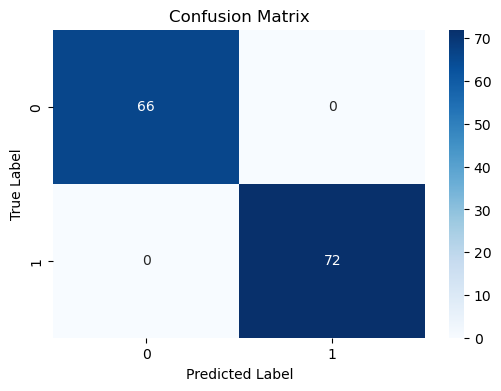

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
importance = model.coef_[0]
plt.figure(figsize=(120, 80))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35320 (\N{CJK UNIFIED IDEOGRAPH-89F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25720 (\N{CJK UNIFIED IDEOGRAPH-6478}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20597 (\N{CJK UNIFIED IDEOGRAPH-5075}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25506 (\N{CJK UNIFIED IDEOGRAPH-63A2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/pyth

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_excel('/kaggle/input/xss-attacks-dataset/XSS Attack Dataset with 461 entries.xlsx')
print(data.columns)

Index(['App Names', 'Permissions', 'API Name', 'Website Name', 'IP',
       'Location', 'Label'],
      dtype='object')


In [14]:
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])


In [15]:
one_hot_encoder = OneHotEncoder()
X = one_hot_encoder.fit_transform(data.iloc[:, :-1]).toarray()
y = data.iloc[:, -1].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)

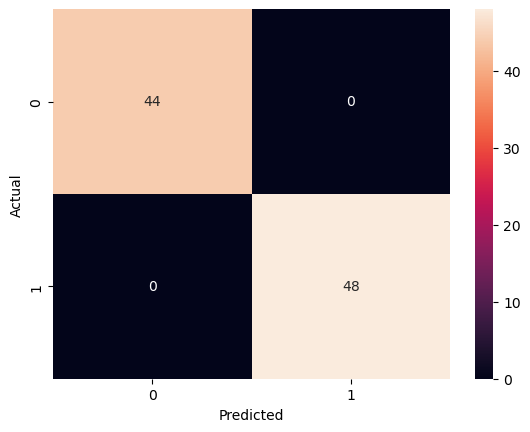

In [20]:
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


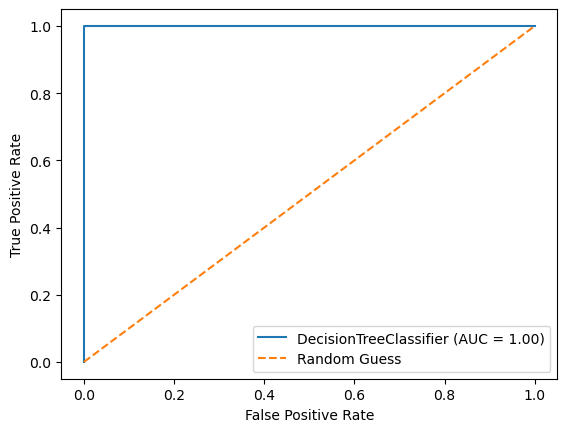

In [21]:
plot_roc_curve(classifier, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()